# LA Times

develop a model to predict post performance for new posts a user may want to create for this account.

In [142]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import zipfile
from pandas.io.json import json_normalize

In [143]:
%%time

with zipfile.ZipFile('posts.json.zip') as myzip:
    with myzip.open('posts.json') as f:
        lines = f.readlines()
        data = [json.loads(line) for line in lines]

CPU times: user 4.05 s, sys: 26 ms, total: 4.08 s
Wall time: 4.08 s


In [144]:
df = json_normalize(data)

display(df.head())
display(df.shape)

,caption,created_time,description,feed_targeting.reach_estimate,id,insights.post_consumptions.description,insights.post_consumptions.id,insights.post_consumptions.name,insights.post_consumptions.period,insights.post_consumptions.title,...,insights.post_video_views_unique.name,insights.post_video_views_unique.period,insights.post_video_views_unique.title,insights.post_video_views_unique.values,link,link_to_post,message,name,picture,story
0,komonews.com,2015-09-17T20:50:00+0000,About 20 western Virginia high school students...,NaN,114431401958534_940695755998757,Lifetime: The number of clicks anywhere in you...,114431401958534_940695755998757/insights/post_...,post_consumptions,lifetime,Lifetime Post Consumptions,...,post_video_views_unique,lifetime,Lifetime Unique Video Views,[{'value': 0}],http://www.komonews.com/news/national/Students...,http://facebook.com/114431401958534_9406957559...,Do you think the Confederate flag should be ba...,Students suspended for clothing displaying Con...,https://external.xx.fbcdn.net/safe_image.php?d...,NaN
1,NaN,2015-09-17T20:20:01+0000,NaN,NaN,114431401958534_940684872666512,Lifetime: The number of clicks anywhere in you...,114431401958534_940684872666512/insights/post_...,post_consumptions,lifetime,Lifetime Post Consumptions,...,NaN,NaN,NaN,NaN,https://www.facebook.com/KOMONews/photos/a.121...,http://facebook.com/114431401958534_9406848726...,Seattle Seahawks' Russell Wilson answered lots...,Timeline Photos,https://fbcdn-photos-b-a.akamaihd.net/hphotos-...,NaN
2,komonews.com,2015-09-17T19:49:28+0000,Despite September looking like it will break o...,NaN,114431401958534_940684229333243,Lifetime: The number of clicks anywhere in you...,114431401958534_940684229333243/insights/post_...,post_consumptions,lifetime,Lifetime Post Consumptions,...,post_video_views_unique,lifetime,Lifetime Unique Video Views,[{'value': 0}],http://www.komonews.com/weather/blogs/scott/Ne...,http://facebook.com/114431401958534_9406842293...,"It'll be a bummer for snow lovers, but warm-we...","New forecasts still say mild winter, hot summe...",https://external.xx.fbcdn.net/safe_image.php?d...,NaN
3,komonews.com,2015-09-17T19:18:00+0000,Amazon is dangling a $50 tablet computer in it...,NaN,114431401958534_940637569337909,Lifetime: The number of clicks anywhere in you...,114431401958534_940637569337909/insights/post_...,post_consumptions,lifetime,Lifetime Post Consumptions,...,post_video_views_unique,lifetime,Lifetime Unique Video Views,[{'value': 0}],http://www.komonews.com/news/tech/Amazon-dangl...,http://facebook.com/114431401958534_9406375693...,What do you think of Amazon's cheaper tablet?,Amazon dangles $50 tablet computer to hook mor...,https://fbexternal-a.akamaihd.net/safe_image.p...,NaN
4,komonews.com,2015-09-17T18:45:00+0000,Earth's record-breaking heat is sounding an aw...,NaN,114431401958534_940535546014778,Lifetime: The number of clicks anywhere in you...,114431401958534_940535546014778/insights/post_...,post_consumptions,lifetime,Lifetime Post Consumptions,...,post_video_views_unique,lifetime,Lifetime Unique Video Views,[{'value': 0}],http://www.komonews.com/news/national/Earths-r...,http://facebook.com/114431401958534_9405355460...,Meteorologists say 2015 is a near certainty to...,Earth's record streak of record heat keeps on ...,https://external.xx.fbcdn.net/safe_image.php?d...,NaN


(8639, 359)

In [145]:
insights = df[[col for col in df if col.startswith('insights')]]

In [146]:
pd.DataFrame((df.isna().sum()/df.shape[0]).sort_values(), columns=['Null %'])

,Null %
insights.post_story_adds.description,0.000000
insights.post_negative_feedback.id,0.000000
insights.post_negative_feedback.name,0.000000
insights.post_negative_feedback.period,0.000000
insights.post_negative_feedback.title,0.000000
insights.post_negative_feedback.values,0.000000
insights.post_negative_feedback_by_type.description,0.000000
insights.post_negative_feedback_by_type.id,0.000000
insights.post_negative_feedback_by_type.name,0.000000
insights.post_negative_feedback_by_type.period,0.000000


In [147]:
def check_value(x):
    if type(x) == list:
#         if type(x[0]['value']) == dict:
#             keys = list(x[0]['value'].keys())
#             ratio = float(x[0]['value'][keys[0]])/x[0]['value'][keys[0]]
#             return ratio
        return x[0]['value']
    else:
        return x

In [148]:
it = insights[[col for col in insights.columns if 'values' in col]]

it.head()

,insights.post_consumptions.values,insights.post_consumptions_by_type.values,insights.post_consumptions_by_type_unique.values,insights.post_consumptions_unique.values,insights.post_engaged_fan.values,insights.post_engaged_users.values,insights.post_fan_reach.values,insights.post_impressions.values,insights.post_impressions_by_paid_non_paid.values,insights.post_impressions_by_paid_non_paid_unique.values,...,insights.post_video_retention_graph_autoplayed.values,insights.post_video_retention_graph_clicked_to_play.values,insights.post_video_views.values,insights.post_video_views_autoplayed.values,insights.post_video_views_clicked_to_play.values,insights.post_video_views_organic.values,insights.post_video_views_organic_unique.values,insights.post_video_views_paid.values,insights.post_video_views_paid_unique.values,insights.post_video_views_unique.values
0,[{'value': 170}],"[{'value': {'other clicks': 151, 'link clicks'...","[{'value': {'other clicks': 91, 'link clicks':...",[{'value': 107}],[{'value': 117}],[{'value': 117}],[{'value': 3566}],[{'value': 4072}],"[{'value': {'paid': 0, 'total': 4072, 'unpaid'...","[{'value': {'paid': 0, 'total': 3583, 'unpaid'...",...,[{'value': {}}],[{'value': {}}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}]
1,[{'value': 88}],"[{'value': {'other clicks': 61, 'link clicks':...","[{'value': {'other clicks': 49, 'link clicks':...",[{'value': 65}],[{'value': 76}],[{'value': 77}],[{'value': 3560}],[{'value': 5297}],"[{'value': {'paid': 0, 'total': 5297, 'unpaid'...","[{'value': {'paid': 0, 'total': 3618, 'unpaid'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[{'value': 2169}],"[{'value': {'other clicks': 1162, 'link clicks...","[{'value': {'other clicks': 847, 'link clicks'...",[{'value': 1688}],[{'value': 1799}],[{'value': 2001}],[{'value': 37757}],[{'value': 65538}],"[{'value': {'paid': 0, 'total': 65538, 'unpaid...","[{'value': {'paid': 0, 'total': 43336, 'unpaid...",...,[{'value': {}}],[{'value': {}}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}]
3,[{'value': 238}],"[{'value': {'other clicks': 95, 'link clicks':...","[{'value': {'other clicks': 84, 'link clicks':...",[{'value': 197}],[{'value': 209}],[{'value': 212}],[{'value': 6036}],[{'value': 9226}],"[{'value': {'paid': 0, 'total': 9226, 'unpaid'...","[{'value': {'paid': 0, 'total': 6263, 'unpaid'...",...,[{'value': {}}],[{'value': {}}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}]
4,[{'value': 362}],"[{'value': {'other clicks': 241, 'link clicks'...","[{'value': {'other clicks': 161, 'link clicks'...",[{'value': 255}],[{'value': 306}],[{'value': 314}],[{'value': 19474}],[{'value': 32136}],"[{'value': {'paid': 0, 'total': 32136, 'unpaid...","[{'value': {'paid': 0, 'total': 20364, 'unpaid...",...,[{'value': {}}],[{'value': {}}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}],[{'value': 0}]


# Create Consumption dataframe and join to features

In [149]:
new = it.applymap(lambda x: check_value(x)).select_dtypes(include=[np.number])

In [150]:
# Fill nulls with imputed data
new = new.fillna(method='pad')

## Look at captions
- create feature for komonews

In [151]:
features =pd.get_dummies(df['caption'].fillna('').str.contains(r'komonews.com'), 
                         drop_first=True, prefix='komonnews')

## Parse Time

In [152]:
df['created_time'] = pd.to_datetime(df['created_time'])

## Create time features

In [153]:
weekday_name = df['created_time'].dt.weekday_name
month = df['created_time'].dt.month_name()

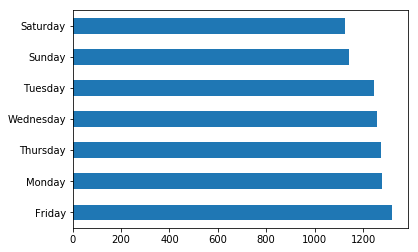

In [154]:
weekday_name.value_counts().plot.barh()

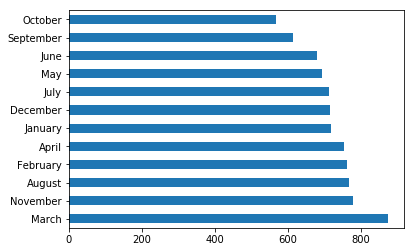

In [155]:
month.value_counts().plot.barh()

## March and Friday have the most content

In [156]:
features = pd.concat([features, pd.get_dummies(weekday_name), pd.get_dummies(month)], 1)

In [157]:
features.head()

,komonnews_True,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Join features with post values

In [158]:
data = pd.concat([features, new], 1, sort=False)

In [159]:
data.shape

(8639, 63)

## Develop Random Forest Regression model to predict insights.post_consumptions.values
- Random Forest will be a good choice, because we do not have much feature engineering


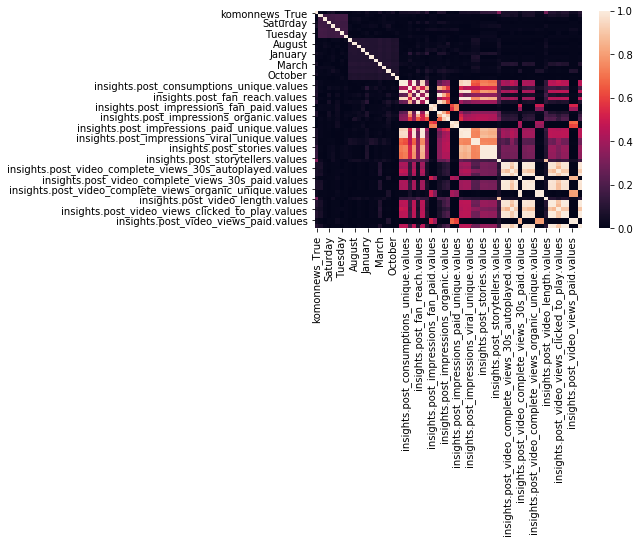

In [160]:
import seaborn as sns

sns.heatmap(data.corr().abs())

## Dropping correlated variables actually makes the model worse

In [161]:
# # Create correlation matrix
# corr_matrix = data.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find index of feature columns with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# data = data.drop(to_drop, axis=1)

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [163]:
X = data.drop('insights.post_consumptions.values',1)
Y = data['insights.post_consumptions.values']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [165]:
%%time

reg = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)

CPU times: user 9.26 s, sys: 38.4 ms, total: 9.3 s
Wall time: 9.3 s


In [166]:
reg.score(X_test, y_test)

0.7490525340945873

## Show 10-fold cross-validation

In [167]:
%%time 

cross_val_score(reg, X, Y, cv=10)

CPU times: user 2min 7s, sys: 640 ms, total: 2min 8s
Wall time: 2min 8s


array([0.88910874, 0.95778171, 0.8151213 , 0.95762685, 0.7878199 ,
       0.76125571, 0.93906046, 0.97260508, 0.96446316, 0.97038151])

## Cross validation shows consistent R-squared values

In [168]:
y_pred = reg.predict(X)

In [169]:
mean_absolute_error(Y, y_pred)

572.3993865030675

## The MAE for this solution is close to 575
- In addition cross validation for this solution is lower error than with highly correlated features dropped.
- It can only improve with more parsed features.

## TODO with more time
- parse actions into appropriate data columns
- Do feature engineering and filtering
- train using Logistic Regression, Random Forest, or Gradient Boosting Classifier to build a model for predicting wether a post should be posted at a particular time yes or no.
- test on new data, and evaluate performance